In [ ]:
import pandas as pd
from Functions import *
gr = pd.read_pickle("greenland_clean.pkl") 
period = [2003,2004]
gr = Graph(gr, period)

: 

In [2]:
jakobs = [69.10-r, 69.10+r, -49.5-r, -49.5+r]
gr.bbox_specialize(jakobs)
G, z, pos = gr.digraph(tamed=True,gran=12)

/Users/noahbergam/Desktop/GAGA/Functions.py:33: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file( gpd.datasets.get_path("naturalearth_lowres"))


In [2]:
import pygmt


fig = pygmt.Figure()
fig.coast(region="4/14/52/57", projection="S0/90/4.5i", frame="ag", land="gray")
fig.show()


GMTCLibNotFoundError: Error loading GMT shared library at 'libgmt.dylib'.
dlopen(libgmt.dylib, 0x0006): tried: '/Users/noahbergam/opt/anaconda3/lib/libgmt.dylib' (no such file), '/Users/noahbergam/opt/anaconda3/lib/libgmt.dylib' (no such file), '/Users/noahbergam/opt/anaconda3/lib/python3.8/lib-dynload/../../libgmt.dylib' (no such file), '/Users/noahbergam/opt/anaconda3/lib/libgmt.dylib' (no such file), '/Users/noahbergam/opt/anaconda3/bin/../lib/libgmt.dylib' (no such file), 'libgmt.dylib' (no such file), '/usr/local/lib/libgmt.dylib' (no such file), '/usr/lib/libgmt.dylib' (no such file), '/Users/noahbergam/Desktop/GAGA/libgmt.dylib' (no such file)

/Users/noahbergam/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


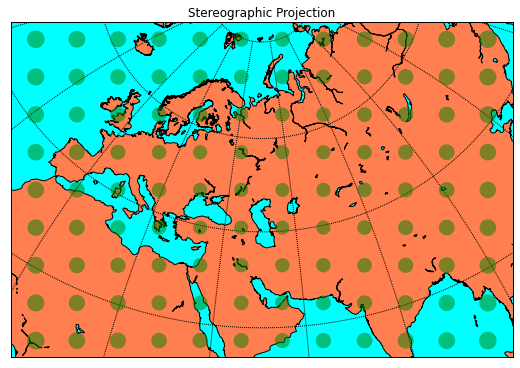

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# setup stereographic basemap.
# lat_ts is latitude of true scale.
# lon_0,lat_0 is central point.
fig, ax = plt.subplots(figsize=(9,12))
m = Basemap(width=12000000,height=8000000,
            resolution='l',projection='stere',\
            lat_1=0.,lat_2=43,lat_0=49,lon_0=50.5)
            #-73.297, 60.03676, -12.20855, 83.64513
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
for y in np.linspace(m.ymax/20,19*m.ymax/20,9):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,12):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,1.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("Stereographic Projection")
plt.show()